# AUC of ROC : Diabetes Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

In [20]:
#print(X)

In [19]:
#print(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

In [21]:
#print(X_train )

In [22]:
#print(X_test)

In [23]:
#print(y_train)
#print(y_test)

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [25]:
#print(X_train )

In [13]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

In [26]:
print(y_test)
print(y_pred_svm)
print(y_pred_logistic)

[0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 1]
[-0.59103749 -0.92003602 -1.60699859 -0.41548069 -1.23093209  0.47599428
 -0.09446646 -0.1912648   1.27314962 -0.91699402  0.14227935 -1.59951703
 -0.17011365 -1.60534753 -1.39573653  0.69577864  1.83245528  1.28395853
 -1.55603542 -1.27284923 -1.6773471   1.15023859  0.09437724  0.4017742
 -0.94093013 -0.50009081 -1.33562897  0.52751924 -0.43116368 -0.9238805
 -0.10679616 -1.9168445  -0.64991021 -1.60757213 -0.45151644 -0.28271826
  0.65078714  1.20114479 -1.2398836   0.86284775  0.1424183  -0.48221241
 -0.97979685  0.94652418 -1.64809293 -1.00702548 -0.4793234   0.71783229
 -1.09507741 -1.87849201  1.36340069 -0.40481156 -1.710597    0.30930394
  0.32657257 -1.36191868 -1.079

In [27]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)
print(auc_logistic)

0.853318250377074


In [28]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)
print(auc_svm)

0.8365384615384616


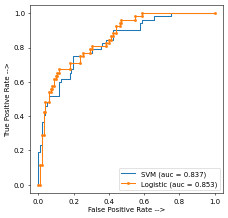

In [30]:
plt.figure(figsize=(5, 5), dpi=50)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [18]:
#print([logistic_fpr, logistic_tpr, threshold])

In [ ]:
#ROC for ANN
#https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/